## IMPORTING NECESSARY LIBARIRIES

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## EXPLORATORY DATA ANALYSIS

In [53]:
# Separate negative Quantity 
df = df[(df["Quantity"] > 0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [55]:
#Separate Negative Price
df = df[df["UnitPrice"] > 0 ]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [57]:
invalid_stockcodes = ["POST", "DOT", "BANK CHARGES", "AMAZONFEE", "B","M",
                      "gift_0001_10", "gift_0001_20", "gift_0001_30", 
                      "gift_0001_40", "gift_0001_50"]

# Remove rows where StockCode is in the invalid list
df = df[~df["StockCode"].isin(invalid_stockcodes)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [59]:
#Renaming the Description to Products
df = df.rename(columns={"Description": "Product"})
df.head()


,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527905 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    527905 non-null  object 
 1   StockCode    527905 non-null  object 
 2   Product      527905 non-null  object 
 3   Quantity     527905 non-null  int64  
 4   InvoiceDate  527905 non-null  object 
 5   UnitPrice    527905 non-null  float64
 6   CustomerID   396473 non-null  float64
 7   Country      527905 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.2+ MB


In [63]:
#Checking for Missing Values
df.isna().sum()

InvoiceNo           0
StockCode           0
Product             0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131432
Country             0
dtype: int64

In [65]:
#Checking for duplictes
df.duplicated().sum()

5221

In [66]:
#Dropping Duplicates
df.drop_duplicates(inplace=True)


In [68]:
df["CustomerID"].value_counts()

CustomerID
17841.0    7667
14911.0    5668
14096.0    5095
12748.0    4397
14606.0    2674
           ... 
12346.0       1
13307.0       1
16990.0       1
15389.0       1
17763.0       1
Name: count, Length: 4334, dtype: int64

In [70]:
#Filling Missing values
df["CustomerID"].ffill(inplace = True)

# Convert CustomerID to integer
df["CustomerID"] = df["CustomerID"].astype(int)


# FEATURE ENGINEERING

## Total Sales

In [75]:
#Sales Feature
df['TotalSales'] = df['Quantity'] * df['UnitPrice']


In [81]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Year

In [85]:
# Extract Year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year

# Group by Year and Sum Sales
yearly_trends = df.groupby('Year')['TotalSales'].sum().reset_index()
yearly_trends

,Year,TotalSales
0,2010,776240.910
1,2011,9478095.013


## Quarter

In [88]:
# Extract Quarter from InvoiceDate

df['Quarter'] = df['InvoiceDate'].dt.quarter

#Group By Quarter and Sum of Sales
quarter_trends = df.groupby("Quarter")["TotalSales"].sum().reset_index()
quarter_trends = quarter_trends.sort_values(by = "Quarter")
quarter_trends


,Quarter,TotalSales
0,1,1869178.620
1,2,1994305.971
2,3,2442606.222
3,4,3948245.110


## Month

In [91]:
# Extract Month Name
df['Month'] = df['InvoiceDate'].dt.strftime('%B') #strftime(string Format Time), %B(Python Magic Code to format date to Month).

# Define the correct month order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Ensure 'Month' is a categorical variable with the correct order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Group by Month and Sum Sales
monthly_trends = df.groupby('Month')['TotalSales'].sum().reset_index()
monthly_trends = monthly_trends.sort_values(by = "Month")
monthly_trends


,Month,TotalSales
0,January,670580.240
1,February,508014.870
2,March,690583.510
3,April,515807.991
4,May,740389.000
5,June,738108.980
6,July,688769.341
7,August,724616.500
8,September,1029220.381
9,October,1104047.300


## Period of The Day

In [93]:
# Define a function to categorize periods of the day
def get_period(hour):
    if hour < 12:
        return 'Morning'
    elif hour < 17:
        return 'Afternoon'
    elif hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to extract periods
df['Period'] = df['InvoiceDate'].dt.hour.apply(get_period)


# Define the correct order of periods
period_order = ["Morning", "Afternoon", "Evening", "Night"]

# Ensure 'Period' is a categorical variable with the correct order
df['Period'] = pd.Categorical(df['Period'], categories=period_order, ordered=True)

# Calculate total sales per period
period_trends = df.groupby('Period')['TotalSales'].sum().reset_index()
period_trends = period_trends.sort_values(by='Period')
period_trends

,Period,TotalSales
0,Morning,3867067.882
1,Afternoon,5738869.351
2,Evening,629567.660
3,Night,18831.030


## Days Of The Week

In [95]:
#Extract the Days Of the Week
df['Days_of_Week'] = df['InvoiceDate'].dt.day_name()

# Define correct order of days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'Days_of_Week' to categorical with correct order
df['Days_of_Week'] = pd.Categorical(df['Days_of_Week'], categories=days_order, ordered=True)

days_of_week_trends = df.groupby('Days_of_Week')['TotalSales'].sum().reset_index()
days_of_week_trends = days_of_week_trends.sort_values(by = "Days_of_Week")
days_of_week_trends

,Days_of_Week,TotalSales
0,Monday,1684105.520
1,Tuesday,2086192.871
2,Wednesday,1783531.390
3,Thursday,2133557.380
4,Friday,1768137.261
5,Saturday,0.000
6,Sunday,798811.501


In [99]:
#Top Selling Products

top_selling = df.groupby('Product')[['Quantity','TotalSales']].sum()
top_selling.head(10)


,Quantity,TotalSales
Product,,
4 PURPLE FLOCK DINNER CANDLES,142,285.70
50'S CHRISTMAS GIFT BAG LARGE,1915,2343.63
DOLLY GIRL BEAKER,2451,2886.25
I LOVE LONDON MINI BACKPACK,388,1624.02
I LOVE LONDON MINI RUCKSACK,1,4.15
NINE DRAWER OFFICE TIDY,58,894.42
OVAL WALL MIRROR DIAMANTE,236,2391.12
RED SPOT GIFT BAG LARGE,1713,2089.92
SET 2 TEA TOWELS I LOVE LONDON,2783,8082.05


In [101]:
top_selling = top_selling.sort_values(by='TotalSales',ascending = False)
top_selling.head(10)

,Quantity,TotalSales
Product,,
REGENCY CAKESTAND 3 TIER,13851,174156.54
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
WHITE HANGING HEART T-LIGHT HOLDER,37872,106236.72
PARTY BUNTING,18283,99445.23
JUMBO BAG RED RETROSPOT,48371,94159.81
MEDIUM CERAMIC TOP STORAGE JAR,78033,81700.92
RABBIT NIGHT LIGHT,30739,66870.03
PAPER CHAIN KIT 50'S CHRISTMAS,19329,64875.59
ASSORTED COLOUR BIRD ORNAMENT,36362,58927.62


In [103]:
df.head(3)

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,December,Morning,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,December,Morning,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,December,Morning,Wednesday


In [105]:
df.to_csv("product.csv", index=False)

# VISUALIZATIONS

## Top Selling Products

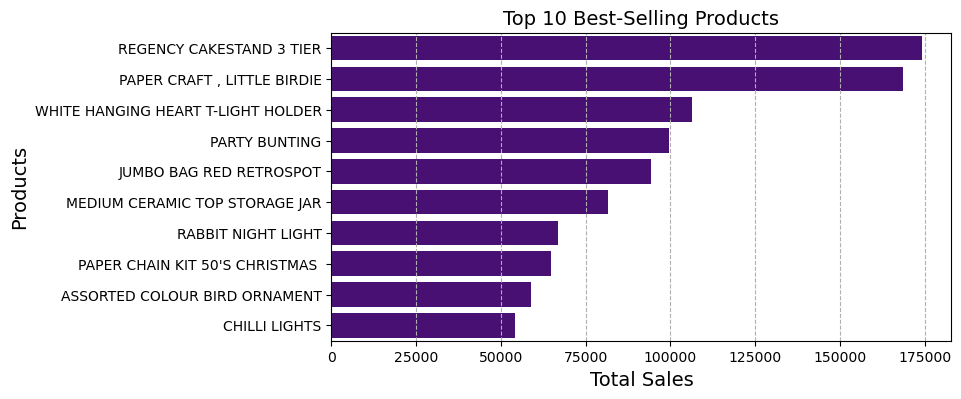

In [108]:
# Set figure size
plt.figure(figsize=(8, 4))

# Create barplot
sns.barplot(x="TotalSales", y="Product", data=top_selling.head(10), color="indigo")

# Labelling the Visual
plt.xlabel("Total Sales",fontsize = 14)
plt.ylabel("Products",fontsize = 14)
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.grid(axis="x", linestyle="--")

# Show the plot
plt.show()

## PURCHASE TRENDS

## Monthly Purchase Trend

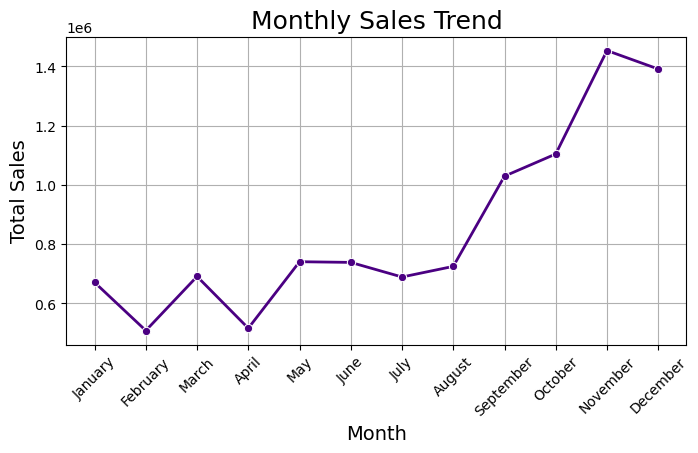

In [113]:
# Create the plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_trends, x='Month', y='TotalSales', marker='o', linewidth=2, color='indigo')

# Customize the chart
plt.title('Monthly Sales Trend', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

## Quarter Of the Year Trends

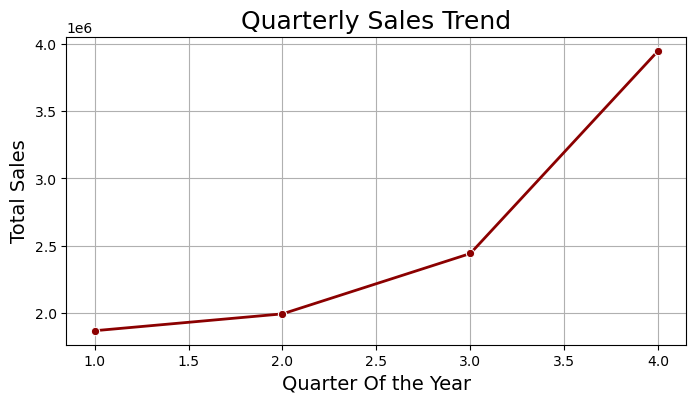

In [116]:
#Create the plot

plt.figure(figsize=(8, 4))

sns.lineplot(data=quarter_trends, x='Quarter', y='TotalSales', marker='o', linewidth=2, color='darkred')

# Customize the chart
plt.title('Quarterly Sales Trend', fontsize=18)
plt.xlabel('Quarter Of the Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=360)  
plt.grid(True)  

# Show the plot
plt.show()

## Daily Purchase Trend

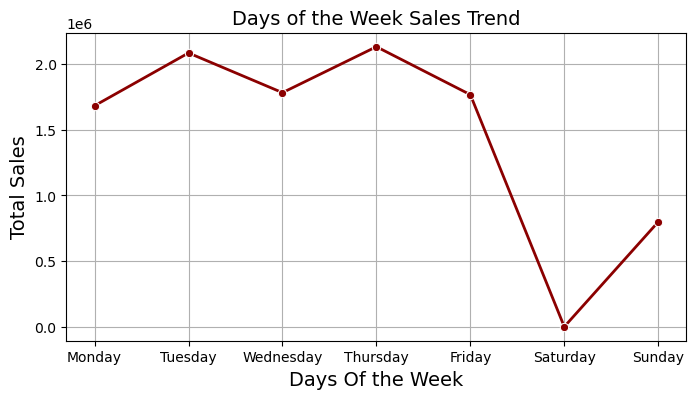

In [119]:
#Create the plot

plt.figure(figsize=(8, 4))

sns.lineplot(data=days_of_week_trends, x='Days_of_Week', y='TotalSales', marker='o', linewidth=2, color='darkred')

# Customize the chart
plt.title('Days of the Week Sales Trend', fontsize=14)
plt.xlabel('Days Of the Week', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=360)  
plt.grid(True)  

# Show the plot
plt.show()

## Period Of The Day Purchase Trends

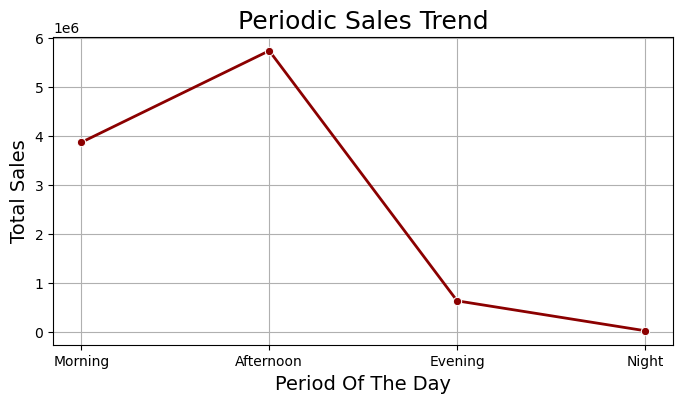

In [122]:
#Create the plot

plt.figure(figsize=(8, 4))

sns.lineplot(data=period_trends, x="Period",y="TotalSales",marker="o",linewidth=2, color= "darkred")

# Customize the chart
plt.title('Periodic Sales Trend', fontsize=18)
plt.xlabel('Period Of The Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=360)  
plt.grid(True)  

# Show the plot
plt.show()


# CLUSTERING ANALYSIS FOR CUSTOMER SEGMENTATION

## RECENCY

In [126]:

#Setting the reference date to the end date of the analysis
reference_date = df["InvoiceDate"].max()

#Grouping data by customer and getting the latest purchase date for each customer
grouped = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()


In [128]:
#Calculating the recency for each customer by subtracting the most recent purchase date from the reference date
grouped["Recency"] = (reference_date - grouped["InvoiceDate"]).dt.days

#Merging the recency value to the dataframe
df = df.merge(grouped[["CustomerID", "Recency"]], on = "CustomerID", how = "left")

## FREQUENCY

In [131]:
#Calculating the frequency for each customer by counting the number of purchases
frequency = df.groupby("CustomerID")["InvoiceNo"].count()

#Merging the frequency value to the dataframe
df = df.merge(frequency, on = "CustomerID", how = "left")
df.rename(columns={"InvoiceNo_x" : "InvoiceNo", "InvoiceNo_y" : "Frequency"}, inplace = True)

## MONETARY VALUE

In [134]:
# Step 1: Compute Monetary value per customer (sum of TotalSales)
monetary_value = df.groupby("CustomerID")["TotalSales"].sum().reset_index()

# Step 2: Merge the monetary value with the main dataframe
df = df.merge(monetary_value, on = "CustomerID", how = "left")

# Rename the column for clarity
df.rename(columns={"TotalSales_x" : "TotalSales", "TotalSales_y" : "MonetaryValue"}, inplace = True)

In [136]:
# Ensure unique customers before clustering
clustering_features = df.groupby("CustomerID").agg({
    "Recency": "min",          # Most recent purchase (smaller is better)
    "Frequency": "max",        # Total number of transactions
    "MonetaryValue" : "max"
}).reset_index()

clustering_features

,CustomerID,Recency,Frequency,MonetaryValue
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,201,2790.16
3,12349,18,72,1457.55
4,12350,309,16,294.40
...,...,...,...,...
4329,18280,277,321,7679.65
4330,18281,180,7,80.82
4331,18282,7,12,178.05
4332,18283,3,719,2039.58


In [138]:
df.head(3)

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week,Recency,Frequency,MonetaryValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,December,Morning,Wednesday,371,297,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,December,Morning,Wednesday,371,297,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,December,Morning,Wednesday,371,297,5391.21


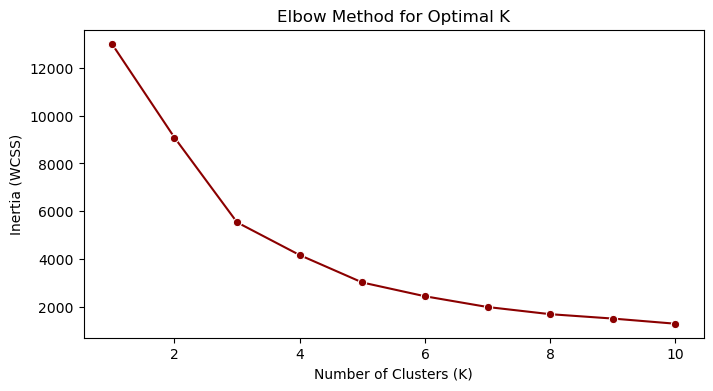

In [140]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features[["Recency", "Frequency", "MonetaryValue"]])

# Finding the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Checking for clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
sns.lineplot(x=K_range, y=inertia, marker="o", color="darkred")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [141]:
# Selecting relevant features
features = ["Recency", "Frequency", "MonetaryValue"]
clustering_features = df[features]

# Standardizing the data
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Applying K-Means clustering with K=3 (since optimal K was 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(clustering_features_scaled)

# Calculate mean MonetaryValue for each cluster
cluster_means = df.groupby("Cluster")["MonetaryValue"].mean()

# Assign meaningful labels based on spending behavior
cluster_mapping = {
    cluster_means.idxmin(): "Low Purchase",
    cluster_means.idxmax(): "High Purchase"
}

# Assign the remaining cluster as Moderate Purchase
remaining_cluster = [c for c in cluster_means.index if c not in cluster_mapping]
if remaining_cluster:
    cluster_mapping[remaining_cluster[0]] = "Moderate Purchase"

# Map clusters to segments
df["Segment"] = df["Cluster"].map(cluster_mapping)

# Display sample data
df.head(3)


,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,December,Morning,Wednesday,371,297,5391.21,2,Low Purchase
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,December,Morning,Wednesday,371,297,5391.21,2,Low Purchase
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,December,Morning,Wednesday,371,297,5391.21,2,Low Purchase


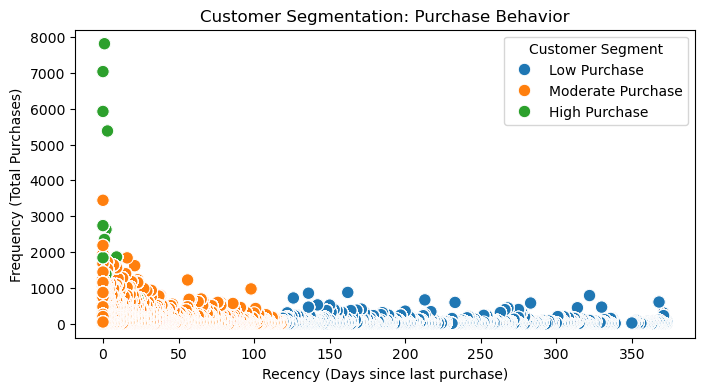

In [142]:
# 2D Scatter Plot (Recency vs Frequency)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Recency", y="Frequency", hue="Segment",s=80)
plt.title("Customer Segmentation: Purchase Behavior")
plt.xlabel("Recency (Days since last purchase)")
plt.ylabel("Frequency (Total Purchases)")
plt.legend(title="Customer Segment")
plt.show()

## SUMMARY STATISTICS

In [144]:
df.describe(include=[float, int])

,Quantity,UnitPrice,CustomerID,TotalSales,Year,Quarter,Recency,Frequency,MonetaryValue,Cluster
count,522684.000000,522684.000000,522684.000000,522684.000000,522684.000000,522684.000000,522684.000000,522684.000000,522684.000000,522684.000000
mean,10.640333,3.286658,15291.262143,19.618615,2010.921871,2.834914,41.705440,798.627924,13763.300791,0.289146
std,156.572632,4.461984,1732.501870,269.901414,0.268375,1.136664,68.682913,1468.915069,33943.007282,0.645862
min,1.000000,0.001000,12346.000000,0.001000,2010.000000,1.000000,0.000000,1.000000,3.750000,0.000000
25%,1.000000,1.250000,13819.000000,3.900000,2011.000000,2.000000,3.000000,124.000000,1631.180000,0.000000
50%,4.000000,2.080000,15189.000000,9.900000,2011.000000,3.000000,15.000000,328.000000,4059.820000,0.000000
75%,12.000000,4.130000,16813.000000,17.700000,2011.000000,4.000000,43.000000,741.000000,9213.250000,0.000000
max,80995.000000,649.500000,18287.000000,168469.600000,2011.000000,4.000000,373.000000,7811.000000,281278.790000,2.000000


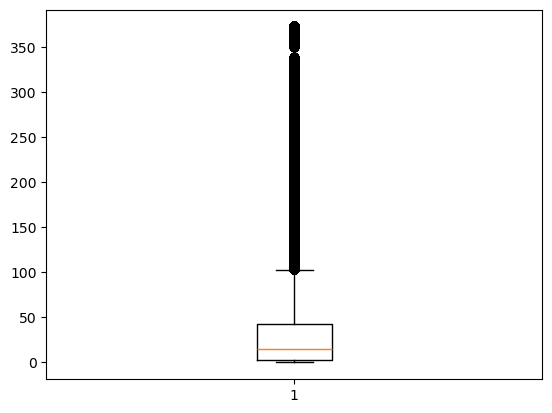

In [149]:
# plotting a boxplot to check for Outliers
plt.boxplot(clustering_features["Recency"])
plt.show()

## PREDICTIVE MODELLING

In [152]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Product', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'Year', 'Quarter',
       'Month', 'Period', 'Days_of_Week', 'Recency', 'Frequency',
       'MonetaryValue', 'Cluster', 'Segment'],
      dtype='object')

In [154]:
df1 = df.drop(["InvoiceNo", "StockCode", "Product", "CustomerID", "Quantity", "UnitPrice"], axis = 1)
df1.head()

,InvoiceDate,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster,Segment
0,2010-12-01 08:26:00,United Kingdom,15.30,2010,4,December,Morning,Wednesday,371,297,5391.21,2,Low Purchase
1,2010-12-01 08:26:00,United Kingdom,20.34,2010,4,December,Morning,Wednesday,371,297,5391.21,2,Low Purchase
2,2010-12-01 08:26:00,United Kingdom,22.00,2010,4,December,Morning,Wednesday,371,297,5391.21,2,Low Purchase
3,2010-12-01 08:26:00,United Kingdom,20.34,2010,4,December,Morning,Wednesday,371,297,5391.21,2,Low Purchase
4,2010-12-01 08:26:00,United Kingdom,20.34,2010,4,December,Morning,Wednesday,371,297,5391.21,2,Low Purchase


In [156]:
df1["Segment"].value_counts()

Segment
Moderate Purchase    426851
Low Purchase          55299
High Purchase         40534
Name: count, dtype: int64

## HANDLING OUTLIERS

In [159]:
## Function to calculate lower and upper whiskers
def calculate_whiskers(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [161]:
num_col = [col for col in df1.select_dtypes(include=['int64', 'float64']).columns if col != "Segment"]
num_col

['TotalSales', 'Recency', 'Frequency', 'MonetaryValue']

In [163]:
## Outlier Handling using winsorization
for i in num_col:
    lw, uw = calculate_whiskers(df1[i])
    df1[i] = np.where(df1[i] < lw, lw, df1[i])
    df1[i] = np.where(df1[i] > uw, uw, df1[i])

In [165]:
df2 = df1.copy()

In [167]:
df1.drop(["InvoiceDate"], axis = 1, inplace = True)

## FEATURE ENCODING

In [170]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
# Define the order for 'Month' and 'Days_of_Week'
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[month_order, days_order])
# Initialize LabelEncoders
label_encoder = LabelEncoder()

lbe = ["Country", "Period"]

for col in lbe:
    df1[col] = label_encoder.fit_transform(df1[col])

df1[["Month", "Days_of_Week"]] = ordinal_encoder.fit_transform(df1[["Month", "Days_of_Week"]])



In [172]:
df1.head()

,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster,Segment
0,36,15.30,2010,4,11.0,2,2.0,103.0,297.0,5391.21,2,Low Purchase
1,36,20.34,2010,4,11.0,2,2.0,103.0,297.0,5391.21,2,Low Purchase
2,36,22.00,2010,4,11.0,2,2.0,103.0,297.0,5391.21,2,Low Purchase
3,36,20.34,2010,4,11.0,2,2.0,103.0,297.0,5391.21,2,Low Purchase
4,36,20.34,2010,4,11.0,2,2.0,103.0,297.0,5391.21,2,Low Purchase


## HANDLING IMBALANCE

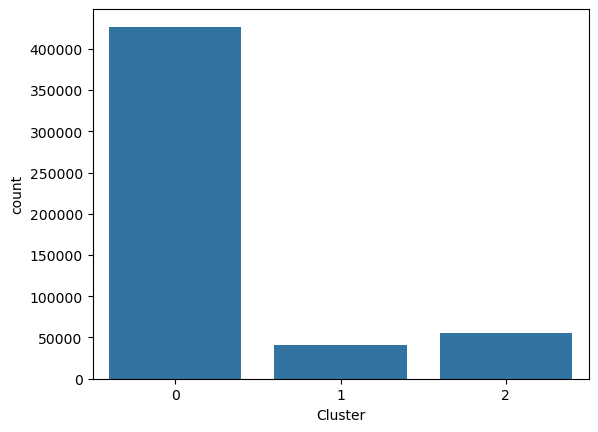

In [175]:
sns.countplot(df1, x = "Cluster")
plt.show()

In [176]:
from sklearn.utils import resample

# Separate classes
df_1 = df1[df1["Cluster"] == 0]  # Minority class
df_2 = df1[df1["Cluster"] == 1]  # Majority class
df_3 = df1[df1["Cluster"] == 2]  # Minority class

min_size = max(len(df_1), len(df_2), len(df_3))  # Get largest class size

df_1_resampled = resample(df_1, replace=True, n_samples=min_size, random_state=42)
df_2_resampled = resample(df_2, replace=True, n_samples=min_size, random_state=42)
df_3_resampled = resample(df_3, replace=True, n_samples=min_size, random_state=42)

df1 = pd.concat([df_1_resampled, df_2_resampled, df_3_resampled]).sample(frac=1, random_state=42)

df1["Cluster"].value_counts()

Cluster
2    426851
0    426851
1    426851
Name: count, dtype: int64

In [177]:
df1.head(3)

,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster,Segment
145466,36,10.20,2011,2,3.0,2,6.0,103.0,135.0,1578.670,2,Low Purchase
201882,36,20.58,2011,2,5.0,0,2.0,22.0,270.0,2820.540,0,Moderate Purchase
133153,36,1.66,2011,1,2.0,0,1.0,2.0,1381.0,20586.355,1,High Purchase


In [178]:
df1["Cluster"].value_counts()

Cluster
2    426851
0    426851
1    426851
Name: count, dtype: int64

## FEATURE SCALING

In [184]:
df1.head()

,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Cluster,Segment
145466,36,10.20,2011,2,3.0,2,6.0,103.0,135.0,1578.670,2,Low Purchase
201882,36,20.58,2011,2,5.0,0,2.0,22.0,270.0,2820.540,0,Moderate Purchase
133153,36,1.66,2011,1,2.0,0,1.0,2.0,1381.0,20586.355,1,High Purchase
127517,36,5.95,2011,1,2.0,0,3.0,103.0,71.0,602.630,2,Low Purchase
146073,36,35.70,2011,2,3.0,0,6.0,103.0,115.0,2222.210,2,Low Purchase


In [186]:
X = df1.drop(columns=["Segment", "Cluster"])
y = df1["Cluster"]

In [188]:
#Checking if they are of the same rows and columns

print(X.shape)
print(y.shape)

(1280553, 10)
(1280553,)


In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)

## MODEL SELECTION

In [194]:

from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report, confusion_matrix

In [196]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, objective="multi:softmax", num_class=3, random_state=42)
model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [198]:
#Train the Model
model.fit(sc_X_train, y_train)
   

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [200]:
#Make Prediction
y_pred = model.predict(sc_X_test)

In [201]:
cluster_mapping = {
    0: "Low Purchase",
    1: "Moderate Purchase",
    2: "High Purchase"
}

y_pred_labels = [cluster_mapping[label] for label in y_pred]

In [202]:
result_df = X_test.copy()  # Copy the test features

result_df["Predicted Cluster"] = y_pred
result_df["Predicted Segment"] = y_pred_labels

result_df.head()

,Country,TotalSales,Year,Quarter,Month,Period,Days_of_Week,Recency,Frequency,MonetaryValue,Predicted Cluster,Predicted Segment
54917,36,11.58,2011,1,0.0,2,4.0,74.0,265.0,2964.530,0,Low Purchase
249987,36,19.96,2011,3,6.0,0,0.0,2.0,1666.5,20586.355,1,Moderate Purchase
200226,36,38.25,2011,2,4.0,2,1.0,103.0,75.0,1594.230,2,High Purchase
253050,36,5.79,2011,3,6.0,0,2.0,103.0,368.0,2745.010,2,High Purchase
490561,36,19.80,2011,4,10.0,2,1.0,10.0,14.0,246.300,0,Low Purchase


In [203]:
## Evaluation
f1 = f1_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")


# print(f"XGboost Model Performance: {name}")
print(f"F1_Score: {f1:.2f}")
print(f"Recall_Score: {recall:.2f}")

F1_Score: 0.99
Recall_Score: 0.99


## FEATURE IMPORTANCE ANALYSIS

In [205]:
# Get feature importance
importance = model.feature_importances_

# Convert to DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

feature_importance_df

,Feature,Importance
9,MonetaryValue,0.499899
7,Recency,0.426346
8,Frequency,0.019998
2,Year,0.013994
4,Month,0.011045
5,Period,0.008565
0,Country,0.008482
6,Days_of_Week,0.005834
3,Quarter,0.003579
1,TotalSales,0.002257


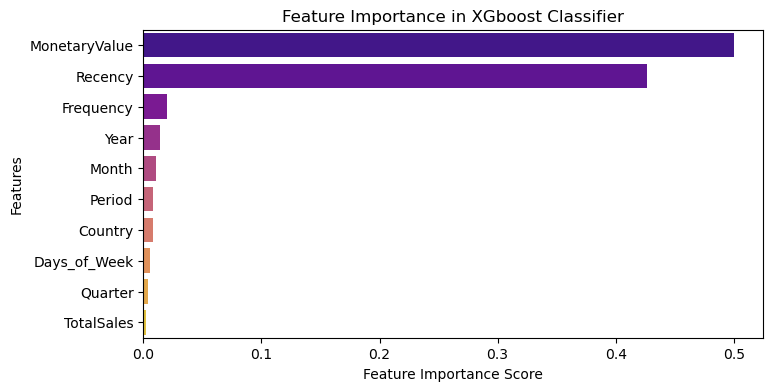

In [206]:
# Plot feature importance using seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="plasma")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in XGboost Classifier")
plt.show()

## TIME SERIES ANALYSIS

In [208]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Prepare Data
df = df[["InvoiceDate", "TotalSales"]]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date  # Extract only the date part
df = df.groupby("InvoiceDate").agg({"TotalSales": "sum"}).reset_index()
df.columns = ["ds", "y"]  # Prophet requires 'ds' (date) and 'y' (values)
df = df.sort_values("ds").reset_index(drop=True)  # Ensure proper indexing

In [209]:
df

,ds,y
0,2010-12-01,57492.33
1,2010-12-02,47596.42
2,2010-12-03,44788.90
3,2010-12-05,30908.67
4,2010-12-06,51767.12
...,...,...
300,2011-12-05,80061.23
301,2011-12-06,55257.31
302,2011-12-07,72799.09
303,2011-12-08,77562.86


## Split the Data into Train & Test Sets

In [211]:
# Train-Test Split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size].reset_index(drop=True), df.iloc[train_size:].reset_index(drop=True)

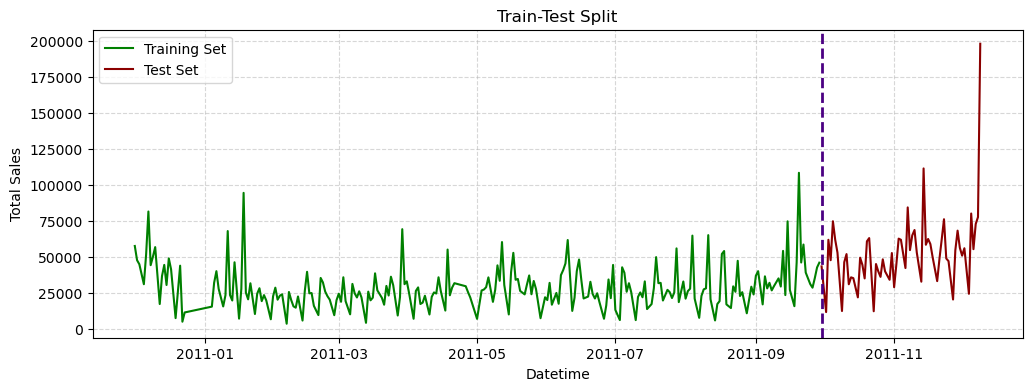

In [212]:
# Train-Test Split Visualization
plt.figure(figsize=(12, 4))
plt.plot(train["ds"], train["y"], label="Training Set", color="green")
plt.plot(test["ds"], test["y"], label="Test Set", color="darkred")
plt.axvline(df["ds"].iloc[train_size], color="indigo", linestyle="--", linewidth=2)  # Split line
plt.xlabel("Datetime")
plt.ylabel("Total Sales")
plt.title("Train-Test Split")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Create Future Dates & Forecast

In [214]:
# Initialize Prophet Model
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False, 
                seasonality_mode="additive")  # Improved seasonality handling
model.fit(train)

10:41:23 - cmdstanpy - INFO - Chain [1] start processing
10:41:24 - cmdstanpy - INFO - Chain [1] done processing


In [215]:
# Generate Future Dates & Predict
future = model.make_future_dataframe(periods=len(test), freq="D")
forecast = model.predict(future)

## Plot the Forecast

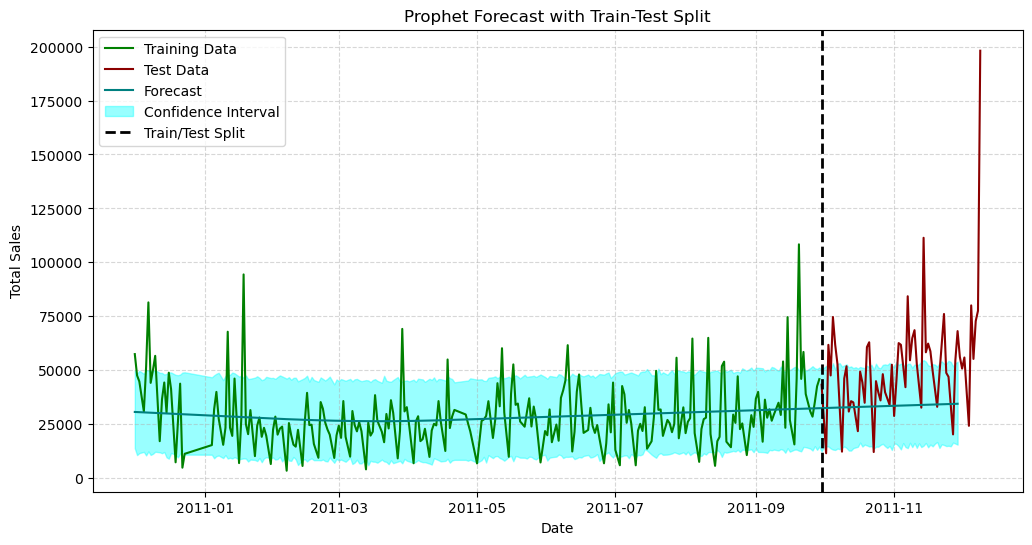

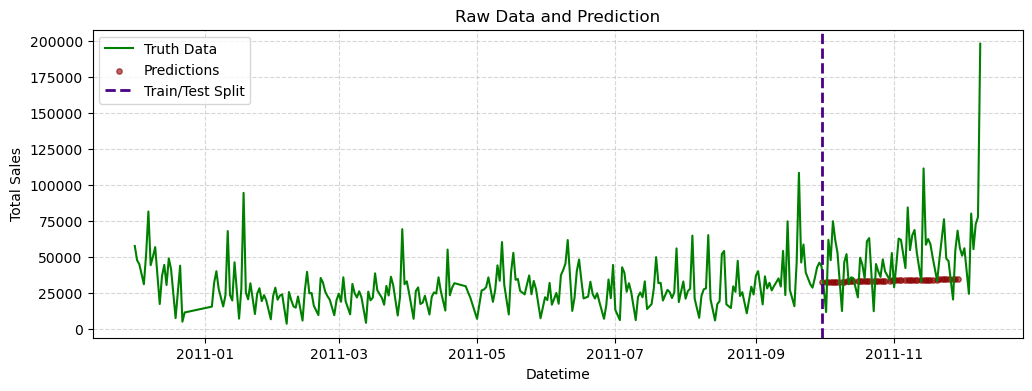

In [217]:
# Create Forecast Plot with Custom Colors
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual (historical) values
ax.plot(train["ds"], train["y"], label="Training Data", color="green")
ax.plot(test["ds"], test["y"], label="Test Data", color="darkred")

# Prophet Forecast Line
ax.plot(forecast["ds"], forecast["yhat"], label="Forecast", color="teal")

# Uncertainty Interval (Shaded Area)
ax.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], 
                color="aqua", alpha=0.4, label="Confidence Interval")

# Formatting
plt.axvline(df["ds"].iloc[train_size], color="black", linestyle="--", linewidth=2, label="Train/Test Split")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Prophet Forecast with Train-Test Split")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Extract predictions that match test set dates
test_forecast = forecast.set_index("ds")["yhat"].reindex(test["ds"]).values  # More robust indexing

# Create Figure
plt.figure(figsize=(12, 4))

# Plot Truth Data (Actual Sales in Blue)
plt.plot(df["ds"], df["y"], label="Truth Data", color="green")

# Plot Predictions (Test Period in Red)
plt.scatter(test["ds"], test_forecast, label="Predictions", color="darkred", s=15, alpha=0.6)

# Formatting
plt.axvline(df["ds"].iloc[train_size], color="indigo", linestyle="--", linewidth=2, label="Train/Test Split")
plt.xlabel("Datetime")
plt.ylabel("Total Sales")
plt.title("Raw Data and Prediction")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Evaluate the Model

In [ ]:
test_forecast = forecast.set_index("ds")["yhat"].reindex(test["ds"]).fillna(method="ffill").values

In [ ]:

# Compute Mean Absolute Error
mae = mean_absolute_error(test["y"].values, test_forecast)
print(f"Mean Absolute Error: {mae:.2f}")